## Detectar manchas y grietas

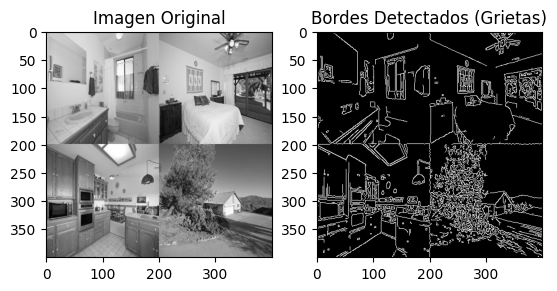

In [10]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Función para detectar bordes en la imagen
def detectar_grietas(image_path):
    # Leer la imagen en escala de grises
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Aplicar el detector de bordes de Canny
    edges = cv2.Canny(image, threshold1=100, threshold2=200)

    # Mostrar la imagen original y la imagen con bordes
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Imagen Original')

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Bordes Detectados (Grietas)')
    plt.show()

# Usar la función para detectar bordes en una imagen
detectar_grietas('../Dataset/Mosaico/Imagenes/120.png')


## Segmentacion de materiales

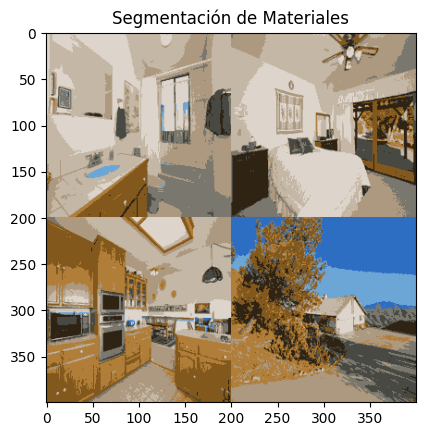

In [13]:
from sklearn.cluster import KMeans
import cv2

def segmentar_materiales(image_path, k=3):
    # Leer la imagen
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convertir la imagen a un array 2D (altura * anchura, 3)
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Definir los criterios de k-means y aplicar el algoritmo
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convertir los centros de vuelta a valores de 8 bits y los labels de vuelta a la forma de la imagen original
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)

    # Mostrar la imagen segmentada
    plt.imshow(segmented_image)
    plt.title('Segmentación de Materiales')
    plt.show()

# Usar la función para segmentar una imagen
segmentar_materiales('../Dataset/Mosaico/Imagenes/120.png', k=10)


## Analisis de iluminacion

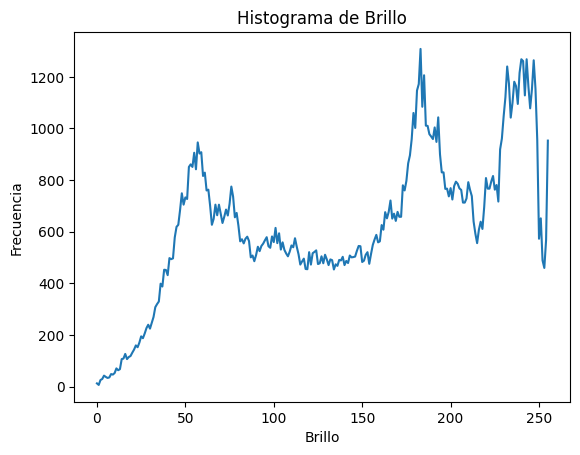

In [15]:
def calcular_brillo(image_path):
    # Leer la imagen
    image = cv2.imread(image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Extraer el canal de brillo (V) y calcular su histograma
    brightness = hsv[:, :, 2]
    hist = cv2.calcHist([brightness], [0], None, [256], [0, 256])

    # Mostrar el histograma de brillo
    plt.plot(hist)
    plt.title('Histograma de Brillo')
    plt.xlabel('Brillo')
    plt.ylabel('Frecuencia')
    plt.show()

# Usar la función para calcular el brillo de una imagen
calcular_brillo('../Dataset/Mosaico/Imagenes/129.png')
